In [33]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

In [34]:
x = torch.linspace(0, 10, 100)
y = torch.linspace(0, 10, 100)
grid_x, grid_y = torch.meshgrid(x, y)
z = grid_x + grid_y

col_x = torch.reshape(grid_x, (-1, 1))
col_y = torch.reshape(grid_y, (-1, 1))

inputs = torch.cat((col_x, col_y), axis=1)
targets = torch.reshape(z, (-1,))

In [37]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.linear = nn.Linear(2, 1)

    def forward(self, input):
        output = self.linear(input)
        return output

In [61]:
net = Net()
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.001)

In [62]:
net.linear.weight

Parameter containing:
tensor([[ 0.1352, -0.6451]], requires_grad=True)

In [63]:
losses = []

for i in range(10000):
    optimizer.zero_grad()
    out = net(inputs[i])
    loss = criterion(out, targets[i])
    # if loss % 100 == 0:
    losses.append(loss)
loss.backward()         
    optimizer.step()

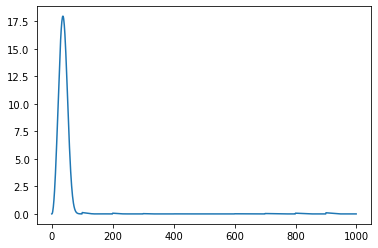

In [65]:
import matplotlib.pyplot as plt
plt.plot(losses[:1000])